<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Gaussian Mixture Models***

$ \ $

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. The use cases of Gaussian mixture model are:

$(1)$ $\color{yellow}{\text{Recommender systems}}$ that make recommendations to users based on preferences (such as Netflix viewing patterns) of similar users (such as neighbors).


$(2)$ $\color{yellow}{\text{Anomaly detection}}$ that identifies rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behavior.


$(3)$ $\color{yellow}{\text{Customer segmentation}}$ that aims at separating customers into multiple clusters, and devise targeted marketing strategy based on each cluster's characteristics.

$ \ $

----

## ***When is GMM better than K-Means?***

$ \ $

Imagine you are a Data Scientist who builds a recommender for selling cars using $K$-Means clustering and you have two clusters with the following description:

* Everybody in cluster $A$ is recommended to buy car $A$, which costs **100k** with a **25k** profit margin.

* Everyone in cluster $B$ is recommended to buy car $B$, which costs **50k** with a **10k** profit margin.


Let's say you want to get as many people in cluster $A$ as possible, why not use an algorithm that informs you of exactly how likely somebody would be interested in purchasing car $A$, instead of one that only tells you a hard yes or no (This is what $K$-Means does!). With $\color{lightblue}{\text{Gausssian Mixture Models}}$, not only will you be getting the predicted cluster labels, the algorithm will also give you the probability of a data point belonging to a cluster. How amazing is that! Whoever, is selling those cars should definitely work on a better plan for a customer with a $90 \%$ chance of purchasing, than for someone with a $75 \%$ chance of purchasing, even though they might show up in the same cluster.



<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/car.png" style="width: 60%">

$ \ $

----

## ***Objectives***


After completing this lab you will be able to:

* Understand what Gaussian mixture is and how its distribution parameters affect the prior probabilities.

* Understand what Gaussian mixture model is and how it works as a clustering technique.

* Apply $GMM$ effectively.

$ \ $

----

## ***Setup***

$ \ $

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.


*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.


*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.


*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


$ \ $

----

## ***Installing Required Libraries***

$ \ $

We recommend you import all required libraries. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from itertools import chain
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
def zip(list_1, list_2, list_3):
  lista = []
  if (len(list_1) == len(list_2) == len(list_3)):
    for i in range(len(list_1)):
      lista.append((list_1[i], list_2[i], list_3[i]))
  return lista

$ \ $

----

## ***Defining Helper Functions***

$ \ $

Use this section to define any helper functions to help the notebook's code readability.

In [4]:
def plot_univariate_mixture(means, stds, weights, N = 10000, seed = 10):
    
    """returns the simulated 1d dataset X, a figure, and the figure's ax"""

    # La semilla aleatoria numpy es un valor numérico que genera un nuevo conjunto o repite números pseudoaleatorios.
    np.random.seed(seed)

    # si las longitudes no son iguales, entonces establecemos esta excepcion
    m = len(means)
    n = len(stds)
    l = len(weights)
    if not (m == n == l):

        # La palabra clave raise genera una excepción específica cuando se cumple una condición o el código encuentra un error . La excepción generada por el programa puede ser una instancia de excepción o una clase de excepción. 
        # Cuando usa la palabra clave raise, puede definir qué tipo de error debe generar la máquina para una excepción en particular.
        raise Exception("Length of mean, std, and weights don't match.") 
    
    # recordar que por defecto N=10000
    # tomamos N numeros de la lista [0,1,...,m-1]
    mixture_idx = np.random.choice(m, size = N, replace = True, p = weights)


    # La función fromiter() se usa para crear una nueva matriz unidimensional a partir de un objeto iterable.
    # ss.norm.rvs es una variable aleatoria continua normal. La palabra clave de ubicación (loc) especifica la media. La palabra clave scale (escala) especifica la desviación estándar.
    lista = [ss.norm.rvs(loc = means[i], scale = stds[i]) for i in mixture_idx]
    X = np.fromiter(lista, dtype = np.float64)
      
    # Devuelvemos 300 números espaciados uniformemente en un intervalo específico. Devuelve un número de muestras espaciadas uniformemente, calculadas sobre el intervalo [start, stop].
    xs = np.linspace(X.min(), X.max(), num = 300)

    # Devuelvemos una matriz de ceros con la misma forma y tipo que una matriz xs
    ps = np.zeros_like(xs)
    
    # realizamosuna iteracion sobre la fusion de means, stds, weights
    for mu, s, w in zip(means, stds, weights):

        # ss.norm.rvs es una variable aleatoria continua normal. La palabra clave de loc especifica la media. La palabra clave scale especifica la desviación estándar.
        ps += ss.norm.pdf(xs, loc = mu, scale = s) * w
    
    # creamos una imagen para mostrar ciertos plots
    fig, ax = plt.subplots()

    # creamos un plot con xs y ps
    # eje x = xs
    # eje y = ps
    ax.plot(xs, ps, label = 'pdf of the Gaussian mixture')

    # establecemos la etiqueta del eje x
    ax.set_xlabel("X", fontsize = 15)

    # establecemos la etiqueta del eje y
    ax.set_ylabel("P", fontsize = 15)

    # establecemos el titulo de la figura
    ax.set_title("Univariate Gaussian mixture", fontsize = 15)
    
    # la funcion devuelve a X como un array de tamaño mx1 y la imagen
    return X.reshape(-1,1), fig, ax   


In [5]:
def plot_bivariate_mixture(means, covs, weights, N = 10000, seed = 10):
    
    """returns the simulated 2d dataset X and a scatter plot is shown"""

    # La semilla aleatoria numpy es un valor numérico que genera un nuevo conjunto o repite números pseudoaleatorios.
    np.random.seed(seed)

    # si las longitudes no son iguales, entonces establecemos esta excepcion
    M = len(means[0])
    m = len(means)
    n = len(covs)
    l = len(weights)
    if not (m == n == l):

        # La palabra clave raise genera una excepción específica cuando se cumple una condición o el código encuentra un error . La excepción generada por el programa puede ser una instancia de excepción o una clase de excepción. 
        # Cuando usa la palabra clave raise, puede definir qué tipo de error debe generar la máquina para una excepción en particular.
        raise Exception("Length of mean, std, and weights don't match.")     
    
    # recordar que por defecto N = 10000
    # tomamos N numeros de la lista range(m)
    mixture_idx = np.random.choice(m, size = N, replace = True, p = weights)

    # multivariate_normal es una variable aleatoria normal multivariada. La palabra clave mean especifica la media y la palabra clave cov especifica la matriz de covarianza.
    lista = [np.random.multivariate_normal(mean = means[i], cov = covs[i]) for i in mixture_idx]
    
    # La función fromiter() se usa para crear una nueva matriz unidimensional a partir de un objeto iterable.
    # La función chain.from_iterable() entra en la categoría de iteradores de terminación. Esta función toma un solo iterable como argumento y todos los elementos del iterable de entrada también deben ser iterables y devuelve un iterable aplanado que contiene todos los elementos del iterable de entrada.
    X = np.fromiter(chain.from_iterable(lista), dtype = float)

    # describimos el tamaño de X
    X.shape = N, M
    
    # tomamos la primera columna de X ------> columna 0
    xs1 = X[:, 0] 

    # tomamos la segunda columna de X ------> columna 1
    xs2 = X[:, 1]
    
    # realizamos un scatter plot con
    # eje x = xs1
    # eje y = xs2
    plt.scatter(xs1, xs2, label = "data")    

    # realizamos una iteracion sobre  means
    for (i, pair) in enumerate(means):

        # realizamos un scatterplot con:
        # eje x = pair[0]
        # eje y = pair[1]
        plt.scatter(pair[0], pair[1], color = 'red')

        # realizamos el proceso anterior hasta que el iterador i es igual a m-1
        if (i == m-1):

            # interrumpimos la iteracion
            break
        
    # mostramos la etiqueta del eje x
    plt.xlabel("$x_1$")

    # mostramos la etiqueta del eje y
    plt.ylabel("$x_2$")

    # describimos el titulo del plot
    plt.title("Scatter plot of the bivariate Gaussian mixture")

    # mostramos la leyenda del plot
    plt.legend()

    # mostramos en pantalla 
    plt.show()
    
    # la funcion devuelve a X
    return X


In [6]:
def draw_ellipse(position, covariance, ax = None, **kwargs):
    
    """Draw an ellipse with a given position and covariance"""

    # La función gca() en el módulo pyplot de la biblioteca matplotlib se usa para obtener la instancia actual
    # de Axes en la figura actual que coincida con los argumentos de palabras clave dados
    ax = ax or plt.gca()
    
    # si el tamaño de covarianza es 2x2, entonces aplicamos este condicional
    if covariance.shape == (2, 2):

        # np.linalg.svd generalmente se usa para la factorización de una matriz A 2D.
        # para mas detalles sobre esta factorizacion, ver pagina 412 mayer
        U, s, Vt = np.linalg.svd(covariance)

        # calculamos el angulo que describe el par (x,y)
        # tan^{-1}(y/x)
        y = U[1, 0]
        x = U[0, 0]
        angle = np.degrees(np.arctan2(y,x))

        # describimos el ancho y el largo
        width, height = 2 * np.sqrt(s)

    # en caso contrario que el anterior condicional falle tomamos como angulo, ancho y alto a lo siguiente
    else:

        # tomamos el angulo igual a cero
        angle = 0

        # describimos el ancho y la altura
        width, height = 2 * np.sqrt(covariance)
    
    # realizamos una iteracion sobre la lista [1,2,3]
    for x in range(1, 4):

        # describimos el ancho y largo para la elipse que vamos a crear
        ancho = x * width
        alto = x * height

        # creamos una elipse con las dimesiones y angulo dado
        elipse = Ellipse(position, ancho, alto, angle, **kwargs)

        # La función Axes.add_patch() en el módulo de ejes de la biblioteca matplotlib se usa para agregar un parche a los parches de los ejes
        ax.add_patch(elipse)

    # mostramos la imagen creada anteriormente
    #return plt.show()


In [7]:
def plot_gmm(gmm, X, label = True, ax = None):

    # La función gca() en el módulo pyplot de la biblioteca matplotlib se usa para obtener la instancia actual
    # de Axes en la figura actual que coincida con los argumentos de palabras clave dados
    ax = ax or plt.gca()

    # describimos el modelo brindado por la funcion
    modelo = gmm

    # entrenamos el modelo
    modelo.fit(X)

    # predicimos un conjunto de datos con el modelo entrenado
    labels = modelo.predict(X)

    # si label = True, entonces ejecutamos este condicional
    if label:

        # realizamos un scatterplot con las dos primeras columnas del array X
        # eje x = X[:, 0]
        # eje y = X[:, 1]
        col_0 = X[:, 0]
        col_1 = X[:, 1]
        ax.scatter(col_0, col_1, c = labels, s = 40, cmap = 'viridis', zorder = 2)

    # si label = False, entonces ejecutamos este condicional
    else:

        # realizamos un scatterplot con las dos primeras columnas del array X
        # eje x = X[:, 0]
        # eje y = X[:, 1]
        col_0 = X[:, 0]
        col_1 = X[:, 1]
        ax.scatter(col_0, col_1, s = 40, zorder = 2)

    # La función Axes.axis() en el módulo de ejes de la biblioteca matplotlib es un método conveniente para obtener o establecer algunas propiedades de los ejes.
    ax.axis('equal')
    
    # describimos un factor de peso
    w_factor = 0.2 / gmm.weights_.max()

    # realizamos una iteracion sobre la fusion gmm.means_, gmm.covariances_, gmm.weights_
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):

        # usamos la funcion anterior para describir una elipse 
        w = w * w_factor
        draw_ellipse(pos, covar, alpha = w)

    # mostramos nuestro plot en pantalla
    return plt.show()
    

$ \ $

----

## ***What are Gaussian Mixture Models (GMM)?***

$ \ $

Gaussian Mixture Models ($GMM$) is a clustering algorithm that:

* Fits a weighted combination of Gaussian distributions to your data.


* The data scientist (you) needs to determine the number of gaussian distributions ($k$).

$ \ $

----

## ***Hard vs Soft Clustering***

$ \ $

There are two kinds of clustering algorithms:

$(1)$ $\color{lightblue}{\text{Hard clustering algorithms}}$ assign each data point to exactly one cluster.


$(2)$  $\color{lightblue}{\text{Soft clustering algorithms}}$ return probabilities of each data point belonging to all $k$ clusters.

$ \ $

$\color{yellow}{\text{GMM}}$ is a soft clustering algorithm.

$ \ $

----

## ***Background***

$ \ $ 

A Gaussian mixture is a weighted combination of $k$ Gaussians, where each is identified by the following parameters:

$(1)$ A mean vector $\boldsymbol{\mu}_i$.


$(2)$ A covariance matrix $\boldsymbol{\Sigma}_i$.


$(3)$ A component weight $\pi_{i}$ that indicates the contribution of the $i$ - th Gaussian. 

$ \ $

When we put altogether, the pdf of the mixture model is formulated as:

$$
P(X) = \sum_{i=1}^K\pi_{i} \ \mathcal{N}\left(X| \ \mu_{i}, \ \Sigma_{i}\right) = \sum_{i=1}^K\pi_i = 1,
$$

Before we start applying the model in a multivariate setting, let's delve (ahondar) into the three parameters and see how changing the parameter values affect the appearance of the Gaussian mixture in a lower dimension. We will use the helper function ***plot_univariate_mixture*** to plot the mixture efficiently.

$ \ $

----

## ***Playing around with means, standard deviations, and weights***

$ \ $

$(1)$ Let's start with a mixture of $3$ univariate Gaussians with:

$(\checkmark)$ $means$ equal to $2, 5, 8$.

$(\checkmark)$ $std$ equal to $0.2, 0.5, 0.8$.

$(\checkmark)$ Component weight $\pi_{i}$ equal to $0.3, 0.3, 0.4$.

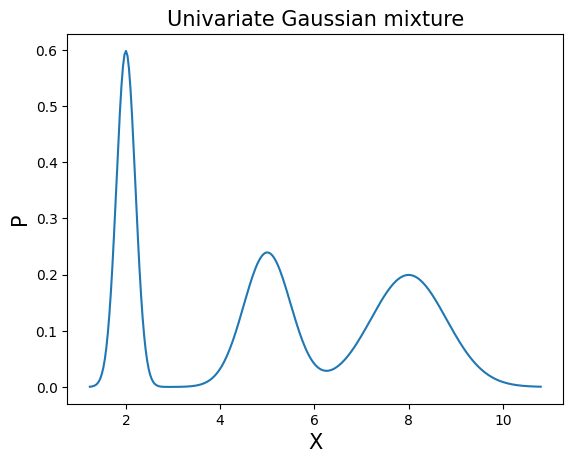

In [8]:
X1, fig1, ax1 = plot_univariate_mixture(means = [2,5,8], stds = [0.2, 0.5, 0.8], weights = [0.3, 0.3, 0.4]) 

When the weight of one Gaussian is reduced or increased, the likelihood of seeing a point from that Gaussian also decreases or increases, as illustrated in the distribution plot above. Hence, in conclusion, the **means** determine the centers of the mixed Gaussians; the **covariance** matrices determine the width and shape of the mixed Gaussians; the **weights** determine the contributions of the Gaussians to the Gaussian mixture.

$ \ $

$(2)$ Now we take the following values to our parameters:

$(\checkmark)$ $means$ equal to $2, 5, 8$.

$(\checkmark)$ $std$ equal to $0.6, 0.9, 1.2$.

$(\checkmark)$ Component weight $\pi_{i}$ equal to $0.3, 0.3, 0.4$.

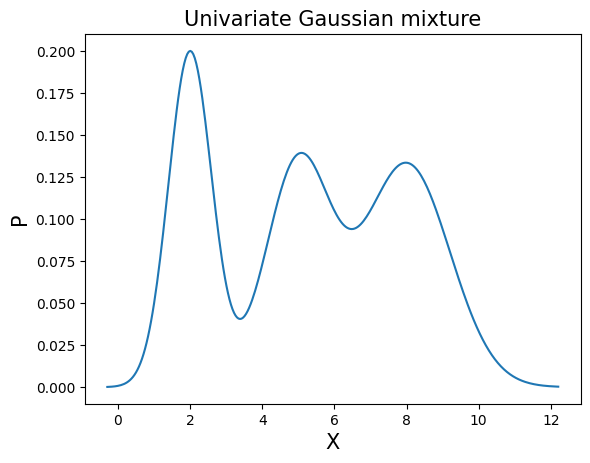

In [9]:
X2, fig2, ax2 = plot_univariate_mixture(means = [2, 5, 8], stds = [0.6, 0.9, 1.2], weights = [0.3, 0.3, 0.4]) 

$ \ $

$(3)$ Now we take the following values to our parameters:

$(\checkmark)$ $means$ equal to $2, 5, 8$.

$(\checkmark)$ $std$ equal to $0.6, 0.9, 1.2$.

$(\checkmark)$ Component weight $\pi_{i}$ equal to $0.05, 0.35, 0.6$.

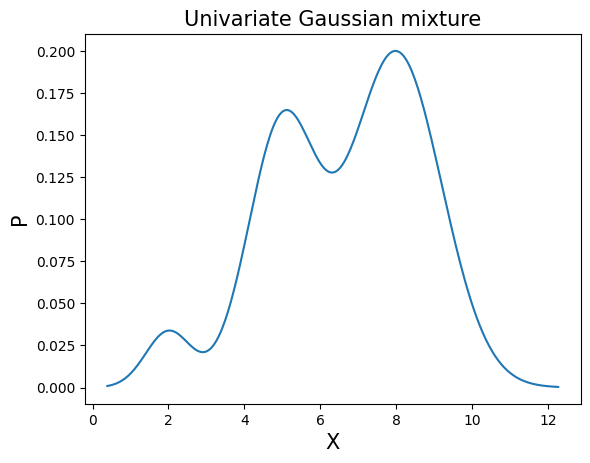

In [10]:
X3, fig3, ax3 = plot_univariate_mixture(means = [2, 5, 8], stds = [0.6, 0.9, 1.2], weights = [0.05, 0.35, 0.6]) 

When the weight of one Gaussian is reduced or increased, the likelihood of seeing a point from that Gaussian also decreases or increases, as illustrated in the distribution plot above.

$ \ $ 

----

## ***Introducing sklearn.mixture.GaussianMixture***

$ \ $

With generated Gaussian mixture data, we know in advance the parameter values of the individual Gaussians. When we encounter a real-world dataset, then: 

$ \ $

$$\color{aquamarine}{\text{How do we know the number of Gaussians to be included in the mixture model and their corresponding parameter values?}}$$

$ \ $

We can utilize the $\color{lightblue}{\text{GaussianMixture}}$ class from ***Scikit-learn***. This class allows us to estimate the parameters of a Gaussian mixture distribution. A $\color{lightblue}{\text{GaussianMixture.fit}}$ method is provided that learns a Gaussian Mixture Model from training data. Given test data, it can assign to each sample the Gaussian it mostly probably belong to using the $\color{lightblue}{\text{GaussianMixture.predict}}$ method. To solve for the parameters of $GMM$, the $\color{orange}{\text{EM algorithm}}$  works by alternating the following steps:

* $\color{orange}{\text{E}}$ (expectation) step: it calculates the expectation of the log-likelihood of observing the dataset using the current parameter estimates.

* $\color{orange}{\text{M}}$ (maximization) step: it seeks new parameters estimates that maximize the expectation found in the  $\color{orange}{\text{E}}$ step.

* This process is repeated  until convergence. 


For more detailed information on the $\color{orange}{\text{EM algorithm}}$, please see the page <a href="https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01"> EM-link</a> 


$ \ $

----

## ***GMM.predict_proba***

$ \ $

One parameter you must specify when implementing a $GMM$ is `n_components`, which tells the algorithm how many clusters to look for in the dataset. Another parameter you should consider is `covariance_type`, which we will talk about later with a multivariate dataset.

$ \ $

Starting with $X1$, the univariate dataset we generated before using ***plot_univariate_mixture***, we can fit a $GMM$ to it with `n_components = 3` and plot the predicted prior probabilities of each point belonging to the $3$ clusters. 

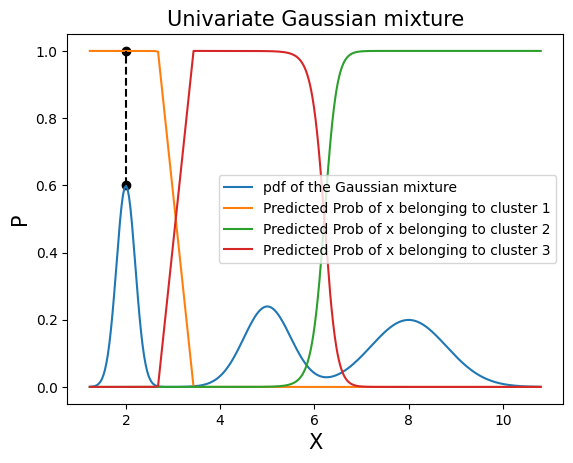

In [11]:
# sort X1 in ascending order for plotting purpose
X1_sorted = np.sort(X1.reshape(-1)).reshape(-1,1)

# creamos un modelo GaussianMixture con 3 componentes
GMM = GaussianMixture(n_components = 3, random_state = 10)

# entrenamos el modelo anterior
GMM.fit(X1_sorted)
 
# predecimos la probabilidad del modelo entrenado usando la data de entrenamiento X1_sorted
prob_X1 = GMM.predict_proba(X1_sorted)

# tomamos las tres primeras columnas de el dataset prob_X1
col_0 = prob_X1[:, 0]
col_1 = prob_X1[:, 1]
col_2 = prob_X1[:, 2]

# recordemos que ax1 son los ejes obteneidos anteriormente
# realizamos un plot en el plano cartesiano (x,y) con:
# eje x = X1_sorted
# eje y = col_0
ax1.plot(X1_sorted, col_0, label = 'Predicted Prob of x belonging to cluster 1')

# realizamos un plot en el plano cartesiano (x,y) con:
# eje x = X1_sorted
# eje y = col_1
ax1.plot(X1_sorted, col_1, label = 'Predicted Prob of x belonging to cluster 2')

# realizamos un plot en el plano cartesiano (x,y) con:
# eje x = X1_sorted
# eje y = col_2
ax1.plot(X1_sorted, col_2, label = 'Predicted Prob of x belonging to cluster 3')

# describimos el punto (2,0.6) en el plano cartesiano
ax1.scatter(2, 0.6, color = 'black')

# describimos el punto (2,1) en el plano cartesiano
ax1.scatter(2, 1.0, color = 'black')

# realizamos un plot en el plano cartesiano (x,y), teniendo en cuenta que:
# eje x = [2, 2]
# eje y = [0.6, 1.0]
# (2,0.6) se une con el punto (2,1)
ax1.plot([2, 2], [0.6, 1.0], '--', color = 'black')

# describimos la leyenda del plot
ax1.legend()

# describimos la figura obtenida 
# tener en cuenta que fig1 es obtenida de la funcion anterior
fig1

To interpret the predicted probabilities, let's take a look at the point colored in black, as an example. On the Gaussian mixture $pdf$, the point is at the the peak of the first bell-shaped curve. Its corresponding probability of belonging to cluster $1$ is equal to $1$, which demonstrates that the probability of the center of a Gaussian distribution belonging to its own cluster is $100 \%$. 


$ \ $

----

## ***Example (Applying GMM on a 2d dataset)***

$ \ $

$(1)$ We will use the helper function ***plot_bivariate_mixture*** to first generate a $2$ - dimentional Gaussian mixture dataset, and then visualize the data points.

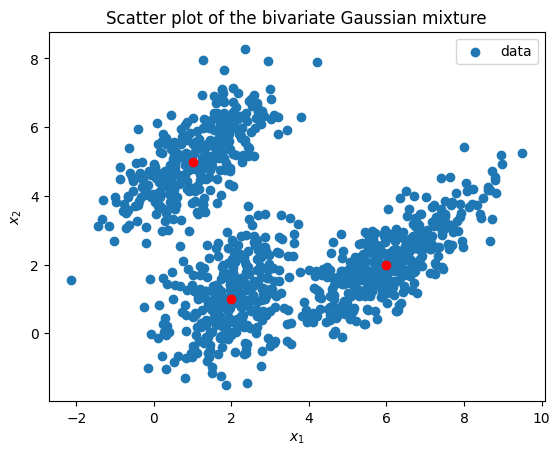

In [12]:
# describimos una lista de promedios
mean = [(1,5), (2,1), (6,2)]

# describimos un array 
cov_1 = np.array([[0.5, 1.0],
                  [1.0, 0.8]])

# describimos un array 
cov_2 = np.array([[0.8, 0.4],
                  [0.4, 1.2]])

# describimos un array 
cov_3 = np.array([[1.2, 1.3],
                  [1.3, 0.9]])

# creamos una lista con los arrays anteriores
cov = [cov_1, cov_2, cov_3]

# creamos una lista de numeros que describiran ciertos "pesos"
weights = [0.3, 0.3, 0.4]

# usamos la funcion anterior para describir el siguiente plot
# la siguiente imagen es el plot obtenido en jupyter notebook
X4 = plot_bivariate_mixture(means = mean, covs = cov, weights = weights, N = 1000)                    

To work with Gaussian Mixture Models ($\color{aquamarine}{\text{GMM}}$), we can use the $\color{yellow}{\text{GaussianMixture function}}$ from sklearn.mixture. The function will fit a $\color{aquamarine}{\text{GMM}}$ to our data and return the clustering result which includes the parameter values we discussed.

$ \ $

$(2)$ We show the shape of $X4$.

In [13]:
X4.shape

(1000, 2)

$ \ $

$(3)$ Fit the $GMM$ model, and show the $3$ Gaussians fitted.

In [14]:
# creamos un modelo GaussianMixture con 3 componentes
gm = GaussianMixture(n_components = 3, random_state = 0)

# entrenamos nuestro modelo
gm.fit(X4)

# describimos los promedios
gm.means_

array([[6.04604662, 2.09240305],
       [1.03001237, 5.06474182],
       [1.96896645, 1.06713977]])

$ \ $

$(4)$ We describe the covariances of the 3 Gaussians fitted by $GMM$.

In [15]:
gm.covariances_

array([[[1.35504595, 0.95174633],
        [0.95174633, 1.07754146]],

       [[1.05182922, 0.76756169],
        [0.76756169, 1.17282816]],

       [[0.71325994, 0.3583451 ],
        [0.3583451 , 1.13319153]]])

The $3$ centers returned by our fitted $GMM$ are all very close to the means we set for generating the mixture data, which means the model fitting was quite successful. We can also draw the $3$ ellipses, using the fitted parameter values, to check if they indeed represent the $3$ clusters from our generated data.

$ \ $

$(5)$ We will use the helper functions $\color{lightblue}{\text{draw_ellipse}}$ and $\color{lightblue}{\text{plot_gmm}}$ to plot the original scatter plot as well as the clusters produced by a fitted $GMM$.

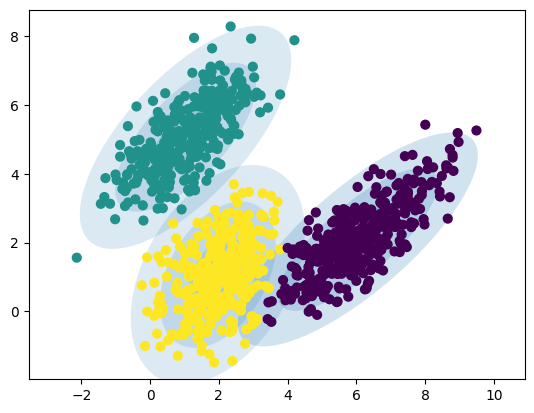

In [16]:
# creamos un modelo GaussianMixture con 3 componentes
model = GaussianMixture(n_components = 3, random_state = 0)

# usamos la funcion plot_gmm creada anteriormente
plot_gmm(model, X4)

For the $\color{lightblue}{\text{sklearn.mixture.GaussianMixture function}}$, not only can we specify the number of clusters we want the $GMM$ to fit, we can also specify the type of covariance parameters to use (recall we discussed that covariance matrices determine the shapes of our Gaussians). Depending on the dataset (different datasets have different Gaussian mixture structures), there are $4$ values you can try for $\color{yellow}{\text{Covariance_type}}$:

- **`full`** each component has its own general covariance matrix.

- **`tied`** all components share the same general covariance matrix.
 
- **`diag`** each component has its own diagonal covariance matrix.

- **`spherical`** each component has its own single variance.

The default $\color{yellow}{\text{Covariance_type}}$ in $\color{lightblue}{\text{sklearn.mixture.GaussianMixture}}$ is **`full`**. Sometimes you can't use $\color{yellow}{\text{Covariance_type}}$ $=$ **`full`**, because you can't invert it and this will give you an error.

$ \ $

$(6)$ Try $\color{yellow}{\text{Covariance_type}}$ $=$ **`tied`**.


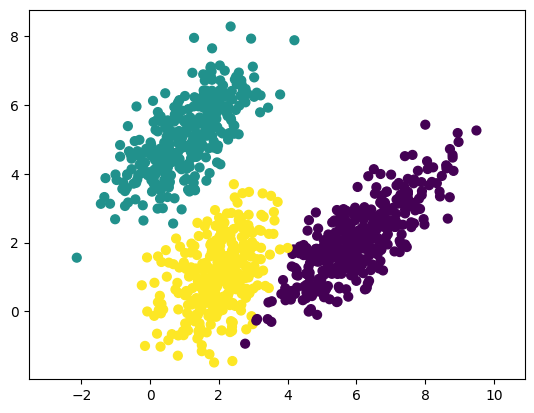

In [17]:
# creamos un modelo GaussianMixture con 3 componentes y covarianza igual a 'tied'
model = GaussianMixture(n_components = 3, covariance_type = 'tied', random_state = 0)

# usamos la funcion plot_gmm creada anteriormente
plot_gmm(model, X4)

$ \ $

$(7)$ Try $\color{yellow}{\text{Covariance_type}}$ $=$ **`diag`**.

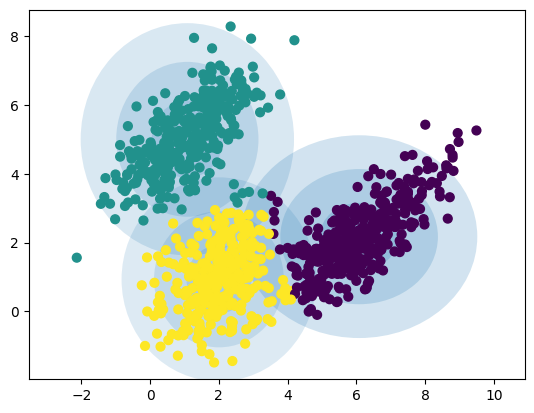

In [18]:
# creamos un modelo GaussianMixture con 3 componentes y covarianza igual a 'diag'
model = GaussianMixture(n_components = 3, covariance_type = 'diag', random_state = 0)

# usamos la funcion plot_gmm creada anteriormente
plot_gmm(model, X4)

It is clear visually that $\color{yellow}{\text{Covariance_type}}$ $=$  `full` is a good choice for the generated data. This makes sense because we did intentionally make each Gaussian have its own covariance matrix. Now we know how to work with GMM in a lower dimension (2d), we can import a real-world dataset and use $GMM$ to perform a clustering analysis on it.

$ \ $ 

----

## ***Example (Applying GMM on real world data - Image Segmentation)***

$ \ $

Image segmentation is the process of segmenting an image into multiple important regions. We can use a $GMM$ to segment an image into **K** regions `(n_components = K)` according to significant colors. Each pixel would be a data point with three features $(r, g, b)$, or one feature, if greyscale. For instance, if we are working with a $256 \times 256$ image, you would have $65536$ pixels in total and your data $X$ would have a shape of $65536 \times 3$.

$ \ $

$(1)$ Let's look at an example using a picture of a house cat.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/gauss-cat.jpeg" style="width: 50%">

$ \ $

$(2)$ Let's download the image.

In [19]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/gauss-cat.jpeg

--2023-05-21 13:50:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/gauss-cat.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 983483 (960K) [image/jpeg]
Saving to: ‘gauss-cat.jpeg.1’

gauss-cat.jpeg.1    100%[===================>] 960.43K  2.41MB/s    in 0.4s    

2023-05-21 13:50:30 (2.41 MB/s) - ‘gauss-cat.jpeg.1’ saved [983483/983483]



$ \ $

$(3)$ Segment our image using $2$ gaussian distributions.

In [20]:
# leemos la imagen 'gauss-cat.jpeg'
img = plt.imread('gauss-cat.jpeg')

# remodelamos el tamaño de img para que tenga tamaño mx3
X = img.reshape(-1, 3)

# creamos un modelo GaussianMixturecon 2 componentes
gmm = GaussianMixture(n_components = 2, covariance_type = 'tied')

# entrenamos nuestro modelo con la data X
gmm.fit(X)

# predecimos un conjunto de datos con nuestro modelo entrenado
labels = gmm.predict(X) 

$ \ $

$(4)$ We replace each pixel with the "average color" or the mean $RGB$ values of the gaussian distribution it belongs to.

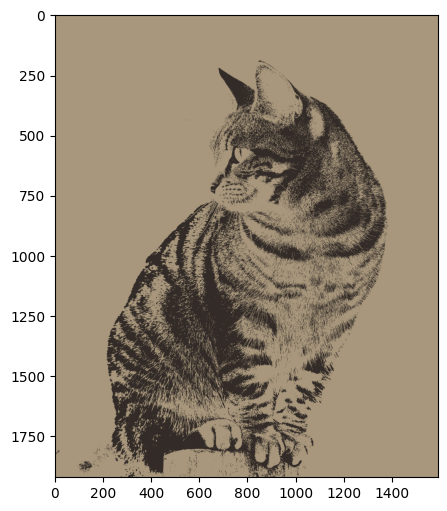

In [21]:
# establecemos una matriz nula de tamaño mxn con m = numero de renglones de X y n = numero de columnas
seg = np.zeros(X.shape) 

# realizamos una iteracion sobre la lista [0,1]
for x in [0,1]:
    
    # gmm = GaussianMixture(n_components = 2, covariance_type = 'tied')
    seg[labels == x] = gmm.means_[x]

# remodelamos seg y hacemos que los datos sean de tipo entero
seg = seg.reshape(img.shape).astype(int)

# creamos una imagen de tamaño 6x6
plt.figure(figsize = (6,6))

# mostramos la imagen en pantalla
plt.imshow(seg);

$ \ $ 

$(5)$ Similarly, if we increase the number of components to $8$.

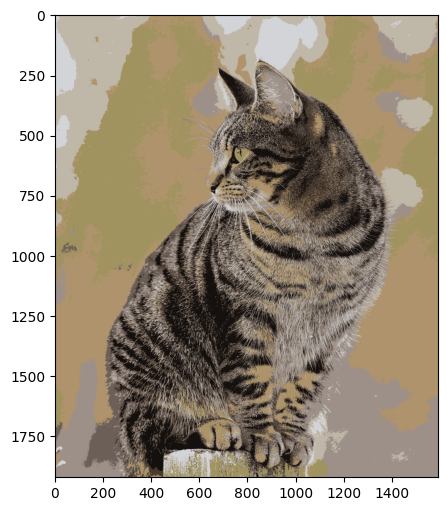

In [22]:
# creamos un modelo GaussianMixture con 8 componentes
gmm = GaussianMixture(n_components = 8, covariance_type = 'tied')

# entrenamos nuestro modelo con la data X
gmm.fit(X)

# predecimos un conjunto de datos con nuestro modelo entrenado
labels = gmm.predict(X) 

# creamos una matriz nula del mismo tamaño que X
seg = np.zeros(X.shape) 

# realizamos una iteracion sobre la lista [0,1,,2,3,4,5,6,7]
for x in range(8):
    seg[labels == x] = gmm.means_[x]

# remodelamos el tamaño de seg para que tenga el mismo tamaño que la imagen pasada
seg = seg.reshape(img.shape).astype(int)

# creamos una imagen para realizar un plot
plt.figure(figsize = (6,6))

# mostramos la imagen creada
plt.imshow(seg)

Our segmented image looks remarkably similar to the original, even though it uses only $8$ colors!

$ \ $

----

## ***Exercises***

$ \ $

For the exercises, we will use the Customer Personality Analysis dataset ([marketing_campaign.csv](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)) from Kaggle, provided by Dr. Omar Romero-Hernandez. Several preprocessing steps were taken, including but not limited to, impute missing values, feature engineering, and feature encoding. The preprocessed customers dataset contains $19$ attributes on the customers purchasing behaviors, education, income, marital status, etc. You will be able to practice principal component analysis ($PCA$), and apply $GMM$ on the dataset for the purpose of customer segmentation.


$ \ $

$(1)$ First we load data into a `pandas.DataFrame`.


In [23]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/customers.csv")
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Living_Status,Children
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,2
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,1,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,1


In [24]:
data.shape

(2216, 19)

$ \ $

$(2)$  Scale the data.

In [25]:
# creamos un modelo escalador estandar
SS = StandardScaler()

# entrenamos nuestro modelo con la data anterior
SS.fit(data)

# predecimos un conjunto de datos
# data -----> data = T(data)
X = SS.transform(data)

$ \ $

$(3)$  Use principal component analysis ($PCA$) with ***`n_components`*** $= 2$ for dimension reduction.

In [26]:
# creamos un modelo de tipo PCA
pca2 = PCA(n_components = 2)

# entrenamos nuestro modelo con la data X
pca2.fit(X)

# predecimos un conjunto de datos con nuestro modelo entrenado
# X -----> X = T(X)
reduced_2_PCA = pca2.transform(X)

$ \ $

$(4)$ Fit a $GMM$ to the reduced data.

In [27]:
# creamos un modelo GaussianMixture con 4 componentes
model = GaussianMixture(n_components = 4, random_state = 0)

# entrenamos nuestro modelo
model.fit(reduced_2_PCA)

GaussianMixture(n_components=4, random_state=0)

$ \ $

$(5)$ Output the predicted labels for visualizing clusters.

In [28]:
# predecimos un conjunto de datos con nuestro modelo entrenado
# X -----> X = T(X)
PCA_2_pred = model.predict(reduced_2_PCA)

$ \ $

$(6)$ Now you can plot the clusters in 2d using 2 principal components, colored by predicted labels.

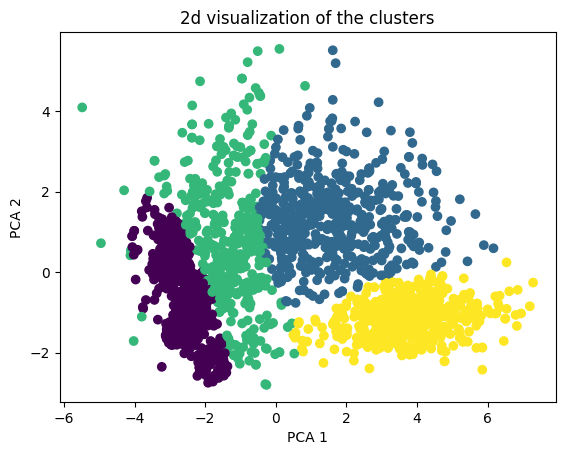

In [29]:
# tomamos el modelo PCA creado con anterioridad y tomamos la columna 0
x = reduced_2_PCA[:, 0]

# tomamos el modelo PCA creado con anterioridad y tomamos la columna 1
y = reduced_2_PCA[:, 1]

# realizamos un plot (x, y) en el plano cartesiano
plt.scatter(x, y, c = PCA_2_pred)

# describimos el titulo del plot
plt.title("2d visualization of the clusters")

# describimos la etiqueta del eje x
plt.xlabel("PCA 1")

# describimos la etiqueta del eje x
plt.ylabel("PCA 2");

$ \ $

$(7)$  Clustering and visualizing using $3$ principal components.

In [30]:
# creamos un modelo PCA con 3 componentes
pca3 = PCA(n_components = 3)

# entrenamos nuestro modelo
pca3.fit(X)

# predecimos un conjunto de datos con nuestro modelo entrenado
# X -------> X = T(X)
reduced_3_PCA = pca3.transform(X)

In [31]:
# creamos un modelo GaussianMixture con 4 componentes
mod = GaussianMixture(n_components = 4, random_state = 0)

# entrenamos nuestro modelo con la data del PCA anterior
mod.fit(reduced_3_PCA)

# predecimos un conjunto de datos con nuestro modelo entrenado sobre la data de entrenamiento reduced_3_PCA
PCA_3_pred = mod.predict(reduced_3_PCA)

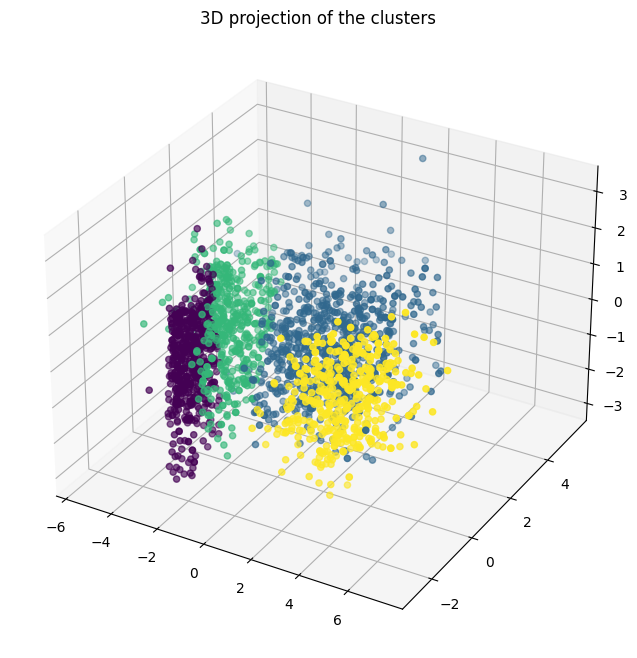

In [32]:
# tomamos la data de entrenamiento de tipo PCA y la convertimos en  un dataframe
reduced_3_PCA = pd.DataFrame(reduced_3_PCA, columns = (['PCA 1', 'PCA 2', 'PCA 3']))

# creamos una imagen para realizar un plot sobre ella
fig = plt.figure(figsize = (10,8))

# creamos los ejes del espacio
ax = fig.add_subplot(111, projection = "3d")

# describimos la data de los ejes y realizamos un scatterplot en (x,y,z)
x = reduced_3_PCA['PCA 1']
y = reduced_3_PCA['PCA 2']
z = reduced_3_PCA['PCA 3']
ax.scatter(x, y, z, c = PCA_3_pred)

# establecemos el titulo de la imagen
ax.set_title("3D projection of the clusters");